In [1]:
import numpy as np

import matplotlib.pyplot as py
%matplotlib inline
import scipy.special as sc
import matplotlib.pyplot
%matplotlib inline

In [2]:
data_file=open("mnist_train.csv",'r')
data=data_file.readlines()
test_file=open("mnist_test.csv",'r')
test=test_file.readlines()
data_file.close()
test_file.close()

In [3]:
class neuralNetwork:
   
    
    def __init__(self,inputnodes,outputnodes,hiddennodes,learningrate):
        self.inodes=inputnodes
        self.onodes=outputnodes
        self.hnodes=hiddennodes
        self.wih=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who=np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        self.lr=learningrate
        self.activation_function=lambda x:sc.expit(x)
        pass
    
    def train(self,input_list,final_list):
        inputs=np.array(input_list,ndmin=2).T
        targets=np.array(final_list,ndmin=2).T
        
        hidden_inputs=np.dot(self.wih,inputs)
        hidden_outputs= self.activation_function(hidden_inputs)
        
        final_inputs=np.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        output_error=targets-final_outputs
        hidden_error=np.dot(self.who.T,output_error)
        self.who+=self.lr*np.dot(output_error*final_outputs*(1.0-final_outputs),np.transpose(hidden_outputs))
        self.wih+=self.lr*np.dot(hidden_error*hidden_outputs*(1.0-hidden_outputs),np.transpose(inputs))
        pass
    def query(self,input_list):
        inputs=np.array(input_list,ndmin=2).T
        
        
        hidden_inputs=np.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=np.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        return final_outputs
        
    

In [4]:
learningrate=0.1
inputnodes=784
outputnodes=10
hiddennodes=200

t=neuralNetwork(inputnodes,outputnodes,hiddennodes,learningrate)


In [5]:
for m in range(2):
 
 for record in data:
    x=record.split(',')

    all_values=((np.asfarray(x[1:])/255.0)*0.99)+0.01
    targets=np.zeros(outputnodes)+0.01
    targets[int(x[0])]=0.99
    t.train(all_values,targets)
    
    pass
pass    

In [6]:
scorecard=[]

for record in test:
    x=record.split(',')

    all_values=((np.asfarray(x[1:])/255.0)*0.99)+0.01
    result= t.query(all_values)
    label=int(x[0])
    result=np.argmax(result)
    if(label==result):
        scorecard.append(1)
    else:
        scorecard.append(0)
    pass


In [7]:
scorecard=np.asarray(scorecard)
print(scorecard.sum()/scorecard.size)

0.966


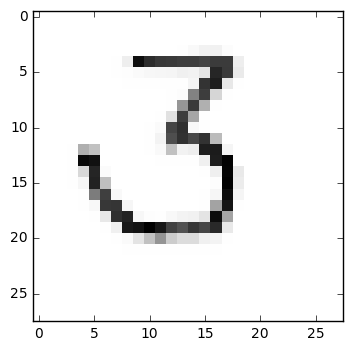

In [16]:
import scipy.misc
img_array=scipy.misc.imread('four.png',flatten=True)
img_data=255.0-img_array.reshape(784)
img_data=((img_data/255.0)*0.99)+0.01
matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

In [18]:
print(t.query(img_data))
np.argmax(t.query(img_data))

[[ 0.00592913]
 [ 0.00914615]
 [ 0.00743372]
 [ 0.61554561]
 [ 0.00063282]
 [ 0.18562178]
 [ 0.02491085]
 [ 0.00256876]
 [ 0.0038465 ]
 [ 0.00579515]]


3